# Fuel Economy Prediction

In [ ]:
import pandas as pd
import seaborn as sns

## TASK 1

In [ ]:
# Read the csv file
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Lets see the data types of all the columns. Interresting thing to see here is the column horsepower is of datatype object although it is comprised of numbers.
# We could see there are no missing values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
#Lets convert the origin column to cateorical
df['origin'] = df.origin.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    object  
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 25.5+ KB


In [ ]:
# Let's see what is happening in the column horsepower. Here we see its all numbers except for one entry which is question mark ?
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
#Now lets see which rows are all question marks? This could be data error or there was no values inputted while creating the data
df.query("horsepower  == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# We could fill in the values by looking up the horse power for each car name or we could go by mean imputation method. Mean imputation method is a very reliable method for handling missin data
#Lets overwrite the horsepower column
# we will use to numeric function. To numeric function is another way of converting data types and it gives a little bit more flexibility.

df["horsepower"] = pd.to_numeric(df["horsepower"], errors = "coerce")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB


In [ ]:
#Here we could see we have 392 non null count of horsepower and is float 64.
# The question marks have been filled in with NaN values.
#Now lets fill in these NaN values with the mean of horsepower column
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    398 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB


In [ ]:
# Now the missing values have been resolved.
#horsepower has non null values and is a float
#Lets look at statistics of this dataset by using describe method
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


<Axes: xlabel='mpg', ylabel='Count'>

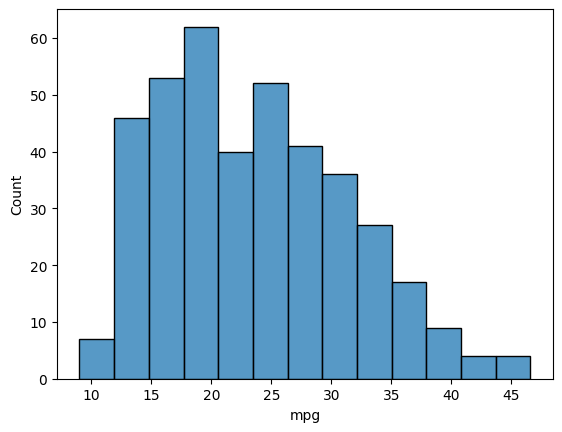

In [ ]:
#lets plot histogram for the column mpg
import seaborn as sns
sns.histplot(df["mpg"])

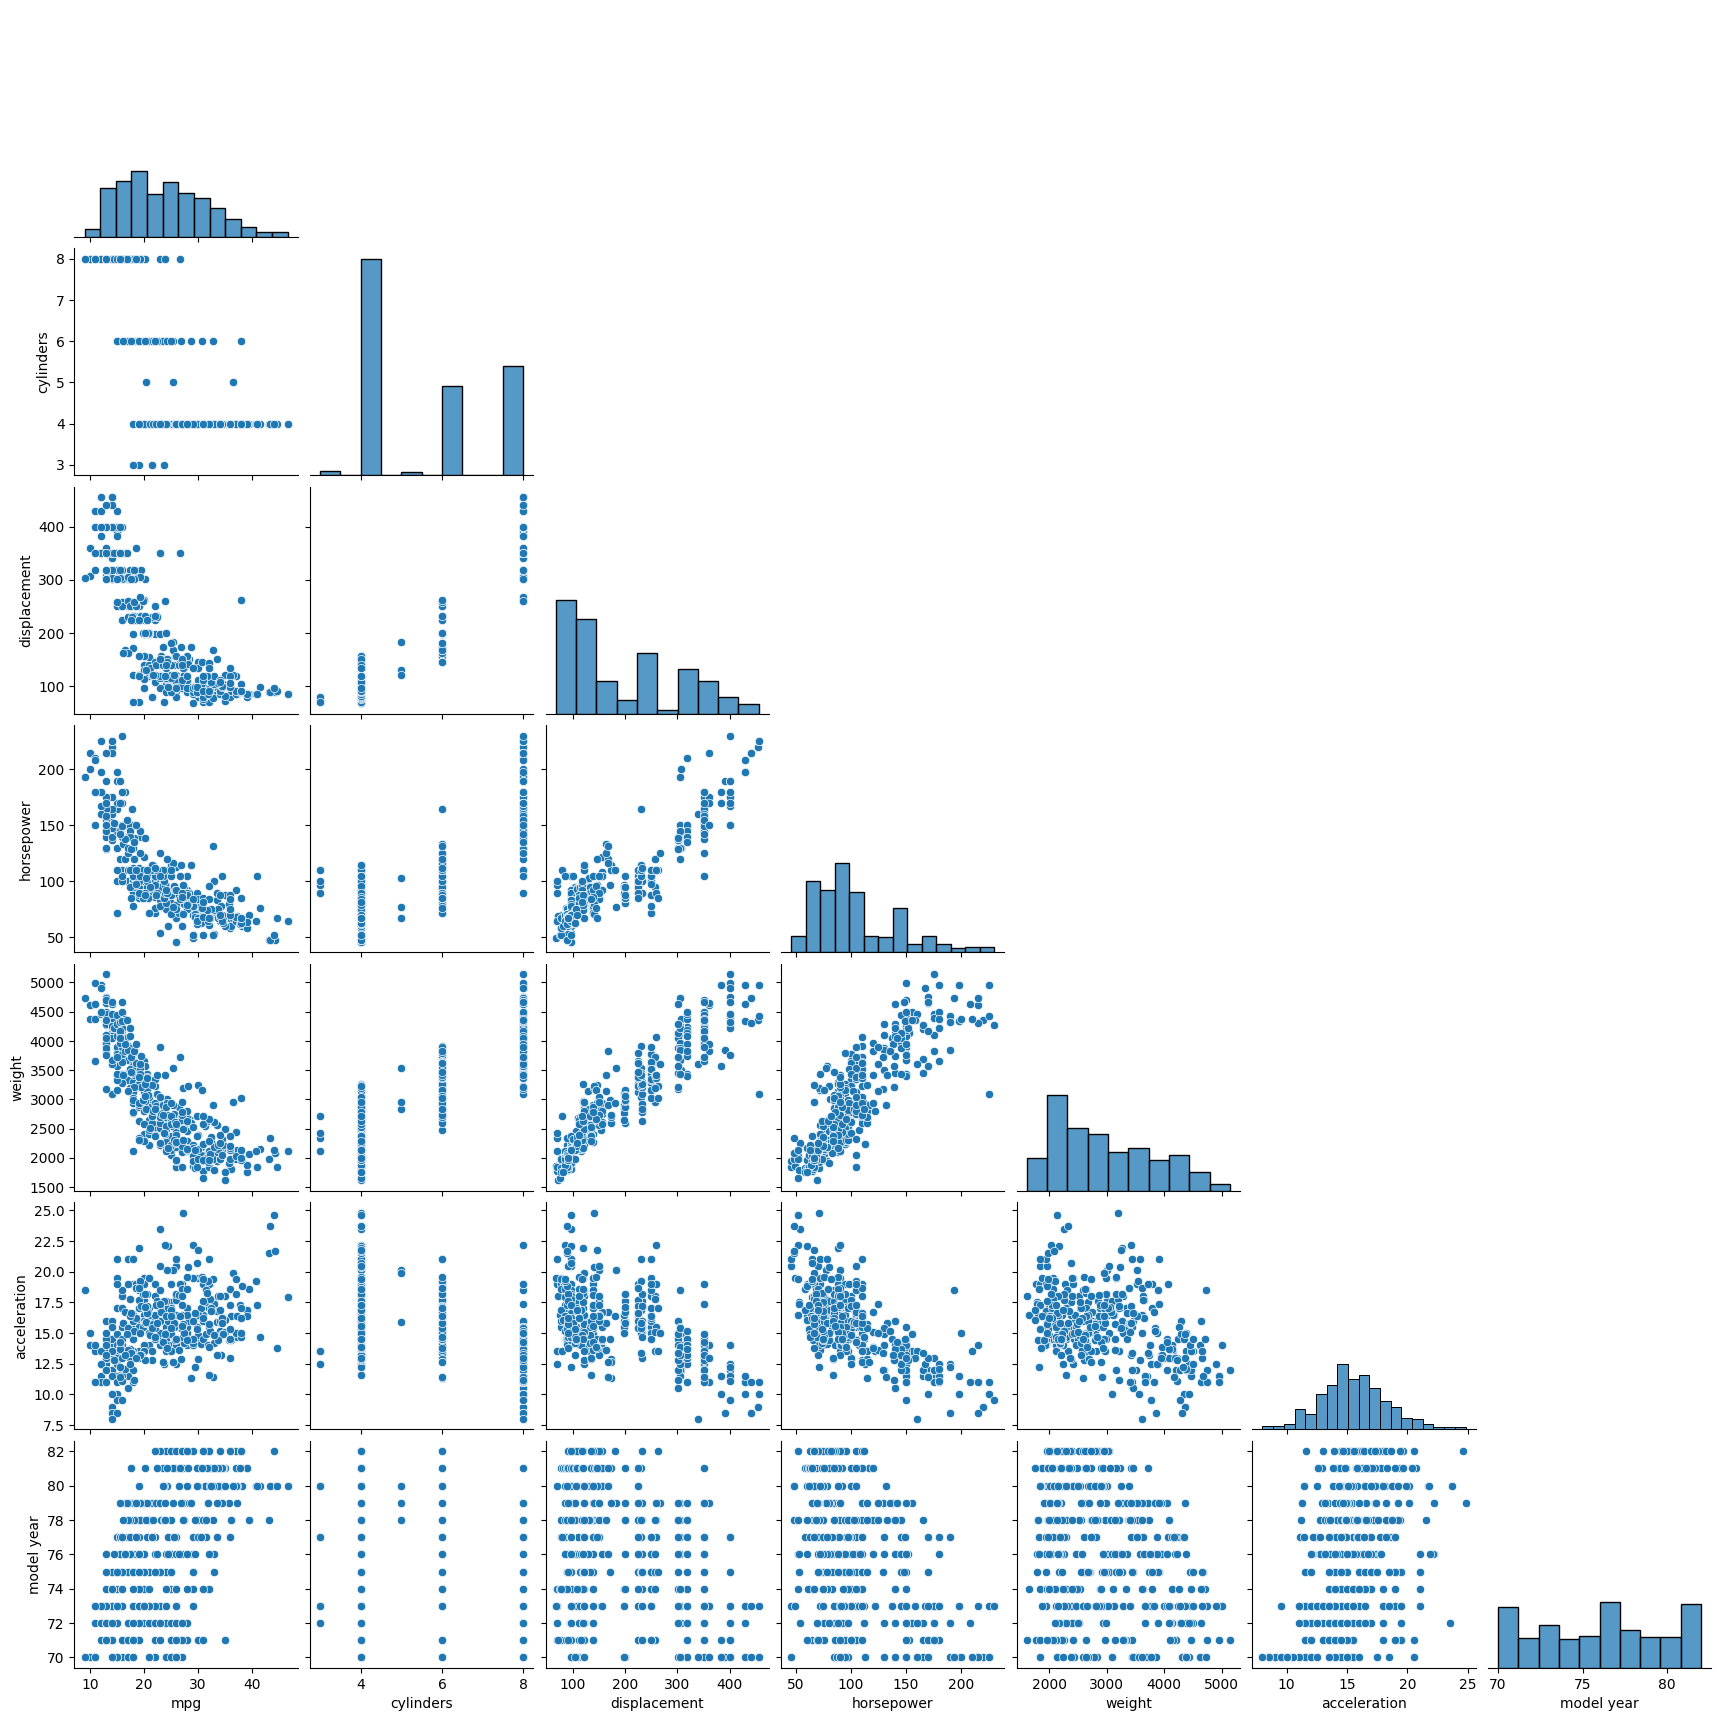

In [ ]:
#Explore the relationships between the features and mpg
# Lets usescatterplot to buid relationships
sns.pairplot(df, corner = True)

<Axes: xlabel='origin', ylabel='mpg'>

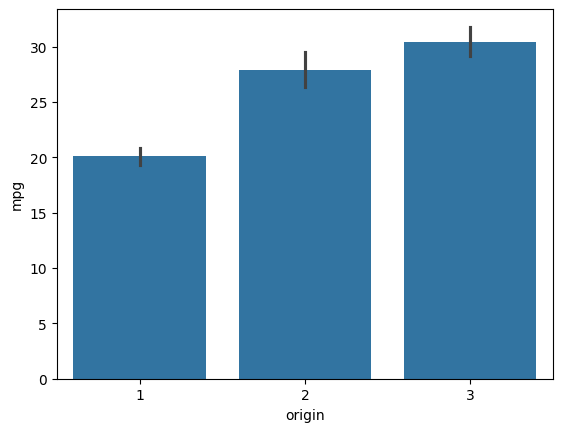

In [ ]:
#lets do barplot between the categorical variable and mpg
sns.barplot(data = df, x ='origin', y = 'mpg')

In [ ]:
#lets see the correlation between mpg and other features
df.corr(numeric_only= True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


<Axes: >

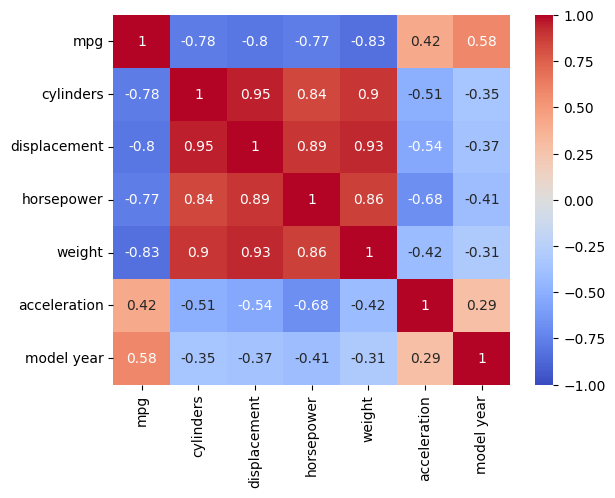

In [ ]:
#As we can see there is a negartive correlation between mpg and cylinders, displacement, horsepower and weight. There is a positvie relation with model year as time goes on, cars get new models with better efficiency
#Lets create a heat map for this.
sns.heatmap(df.corr(numeric_only= True),
            vmin =-1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True
)

#Task 2:
### Split the data and train the model
### 1. Split the data into train and test and select a validation scheme
### 2. Fill the baseline regression model with the strongest feature, here it is mpg
### 3. Fit a multiple regression model

In [ ]:
#Lets import the required libraries for data splitting
from sklearn.model_selection import train_test_split
#lets also import some metrics
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
#lets also import some statsmodels
import statsmodels.api as sm
#lets also import KFold function
from sklearn.model_selection import KFold


# Here I will specify which feature i will use.
# The most strongest feature here is the weight with the highest negative corr -0.83

features = ['weight',
            "cylinders",
            "displacement",
            "horsepower",
            "acceleration",
            "model year"
            ]

#In python, since we are using stats models, we need to add a constant term to our dataframe, this will allow our model to estimate the intercept

X = sm.add_constant(df[features])
# Here y is our target column mpg under the dataframe df

y = df['mpg']

# To setup our train test split, we have four outputs: Training features dataset x, training test dataset x_test, target feature y and target feature test y_test
X, X_test, y, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2023)


In [ ]:
# lets write the code for the KFold model
import numpy as np
kf = KFold(n_splits = 5, shuffle = True, random_state = 2023)

#Create a list to store validation scores for each fold

cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X,y):
  #subset data based on cv fold
  X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
  X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
  # Fit the model on folds trainning data
  model = sm.OLS(y_train, X_train).fit()
  #Append validation score to the list
  cv_lm_r2s.append(r2(y_val,model.predict(X_val),))
  cv_lm_mae.append(mae(y_val,model.predict(X_val),))


print("All validation r2s:", [round(x,3) for x in cv_lm_r2s])
print(f" Cross Val R2s:{round(np.mean(cv_lm_r2s),3)} +- {round(np.std(cv_lm_r2s),3)}")

print("All validation mae:", [round(x,3) for x in cv_lm_mae])
print(f" Cross Val mae:{round(np.mean(cv_lm_mae),3)} +- {round(np.std(cv_lm_mae),3)}")


All validation r2s: [0.84, 0.808, 0.793, 0.769, 0.77]
 Cross Val R2s:0.796 +- 0.026
All validation mae: [2.481, 2.59, 2.582, 2.807, 2.96]
 Cross Val mae:2.684 +- 0.174


In [ ]:
#Fitting the model on just weight alone is giving us a root mean squeare error of 0.677 and a standard dev of 0.058
# our avg mean on the mpg is 3.384, the data is around 9 miles per gallon to 46miles per gallon. This has significanlty reduced our variablility

#Now lets setup our residual analysis plots



In [ ]:
def residual_analysis_plots(model):
  import scipy.stats as stats
  import matplotlib.pyplot as plt

  predictions = model.predict()
  residuals = model.resid

  fig, ax = plt.subplots(1,2, sharex = "all", figsize = (10,6))

  sns.scatterplot(x=predictions, y = residuals, ax =ax[0])
  ax[0].set_title("Residual Plot")
  ax[0].set_xlabel("Prediction")
  ax[0].set_ylabel("Residuals")

  stats.probplot(residuals, dist = "norm", plot = ax[1])
  ax[1].set_title("Normal Q-Q plot")



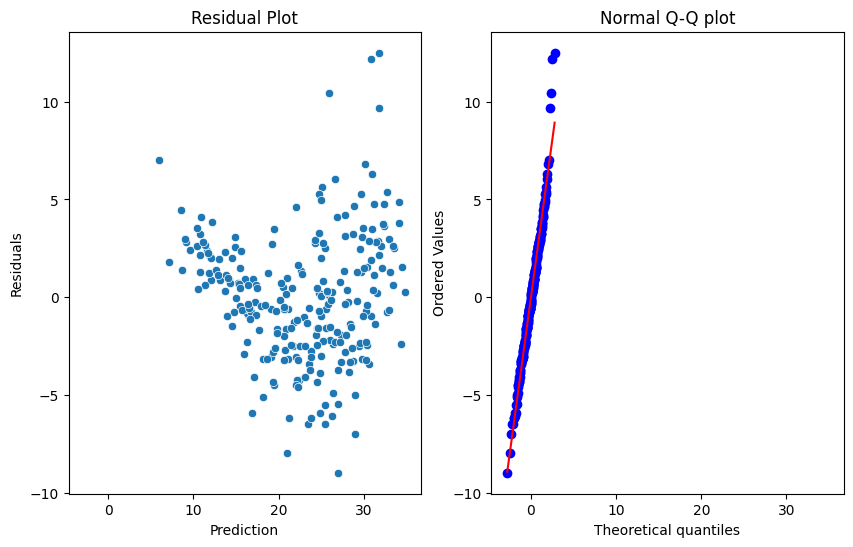

In [ ]:
residual_analysis_plots(model)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     184.4
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.96e-88
Time:                        01:05:50   Log-Likelihood:                -659.81
No. Observations:                 255   AIC:                             1334.
Df Residuals:                     248   BIC:                             1358.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.9896      5.577     -2.688      0.008     -25.973      -4.006
weight          -0.0066      0.001     -7.970      0.000      -0.008      -0.005
cylinders       -0.5627      0.380     -1.483      0.139      -1.310       0.185
displacement     0.0077      0.009      0.869      0.386      -0.010       0.025
horsepower       0.0077      0.016      0.483      0.629      -0.024       0.039
acceleration    -0.0161      0.121     -0.133      0.894      -0.254       0.222
model year       0.7755      0.062     12.518      0.000       0.653       0.898
==============================================================================
Omnibus:                       18.523   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.146
Skew:                           0.456   Prob(JB):                     4.69e-07
Kurtosis:                       4.383   Cond. No.                     8.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# lets fit this model on other folds
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     229.2
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          5.76e-111
Time:                        01:05:53   Log-Likelihood:                -842.02
No. Observations:                 318   AIC:                             1698.
Df Residuals:                     311   BIC:                             1724.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1146      5.224     -3.276      0.001     -27.393      -6.836
weight          -0.0074      0.001     -9.320      0.000      -0.009      -0.006
cylinders       -0.2383      0.372     -0.641      0.522      -0.969       0.493
displacement     0.0059      0.008      0.695      0.488      -0.011       0.023
horsepower       0.0139      0.015      0.930      0.353      -0.016       0.043
acceleration     0.0774      0.111      0.697      0.486      -0.141       0.296
model year       0.7921      0.058     13.599      0.000       0.677       0.907
==============================================================================
Omnibus:                       34.579   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.111
Skew:                           0.642   Prob(JB):                     8.85e-14
Kurtosis:                       4.700   Cond. No.                     8.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""